In [1]:
using LinearAlgebra
using OrdinaryDiffEq
using Plots

# HIV Simulation (Mass-Action)

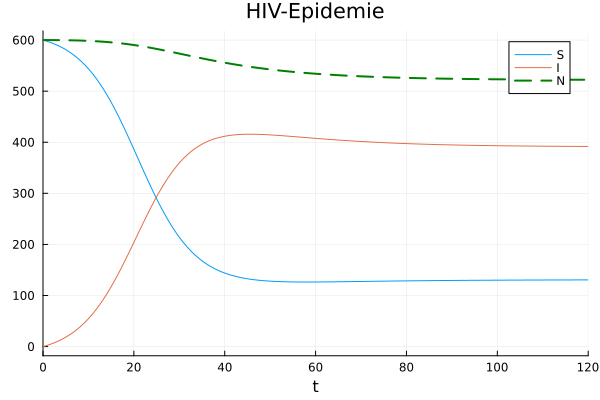

┌ Warning: To maintain consistency with solution indexing, keyword argument vars will be removed in a future version. Please use keyword argument idxs instead.
│   caller = ip:0x0
└ @ Core :-1


In [2]:
function f1(du,u,p,t)
    p, A, α, β, γ, d = p
    du[1] = (1-p) * A - β*u[1]*u[2] - d*u[1] + γ*u[2]    # S'
    du[2] = p * A + β*u[1]*u[2] - (d+γ+α)*u[2]           # I'
end

p = 1/10            # Percentage of incoming population infected
A = 25.0            # Population growth rate
α = 1/120           # Rate of death due to illness
β = 1/3000          # Rate of infection per infected
γ = 0.0             # Rate of recovery
d = 1/24            # Rate of death due to unrelated causes

N0 = 600.0
I0 = 0.0
u0 = [N0 - I0, I0]

tspan = (0.0, 120.0)

prob1 = ODEProblem(f1, u0, tspan, (p, A, α, β, γ, d))
sol1 = solve(prob1, Tsit5(), reltol=1e-8, abstol=1e-8)

plt1 = plot(title="HIV-Epidemie", legend=:topright)
plot!(plt1, sol1, vars=(0,1), label="S")
plot!(plt1, sol1, vars=(0,2), label="I")
plot!(plt1, sol1.t, map(x -> x[1] + x[2], sol1.u), label="N", lw=2, ls=:dash, color=:green)

savefig(plt1, "../figures/hiv-simulation-1.pdf")

display(plt1)

# HIV Simulation (Standard Incidence)

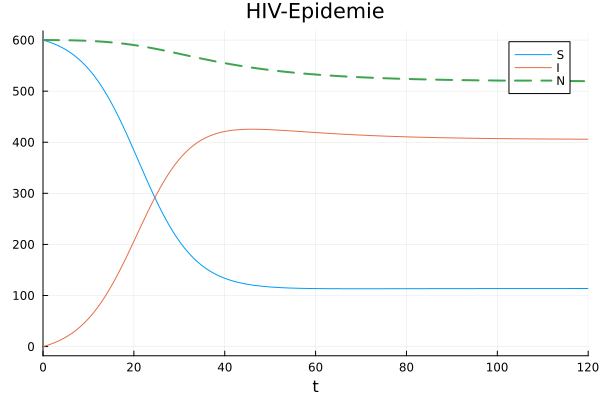

2-element Vector{Float64}:
 113.67032654963764
 405.93588147658176

In [7]:
function f2(du,u,p,t)
    p, A, α, β, γ, d = p
    du[1] = (1-p) * A - β*u[1]*u[2]/(u[1]+u[2]) - d*u[1] + γ*u[2]    # S'
    du[2] = p * A + β*u[1]*u[2]/(u[1]+u[2]) - (d+γ+α)*u[2]           # I'
end

β = 1/5

tspan = (0.0, 120.0)

prob2 = ODEProblem(f2, u0, tspan, (p, A, α, β, γ, d))
sol2 = solve(prob2, Tsit5(), reltol=1e-8, abstol=1e-8)

plt2 = plot(title="HIV-Epidemie", legend=:topright)
plot!(plt2, sol2, vars=(0,1), label="S")
plot!(plt2, sol2, vars=(0,2), label="I")
plot!(plt2, sol2.t, map(x -> x[1] + x[2], sol2.u), label="N", lw=2, ls=:dash)

savefig(plt2, "../figures/hiv-simulation-2.pdf")

display(plt2)

sol2[end]